# Exploratory Data Analysis (EDA)

## Objective
The goal of this project is to perform a full machine learning process to classify transactions as either **fraudulent (1)** or **legitimate (0)**. By analyzing the dataset and building a classification model, we aim to develop an effective system that can detect fraudulent activities based on user and transaction information. 

This involves:
1. Loading and understanding the dataset.
2. Conducting Exploratory Data Analysis (EDA) to identify patterns, anomalies, and insights.
3. Preprocessing the data for machine learning.
4. Building and evaluating classification models.

## Dataset Description
The dataset used for this analysis was obtained from Kaggle, a platform providing access to diverse datasets. It contains the following features:

- **Profession**: The user's profession (e.g., Doctor, Lawyer, or Other).  
- **Income**: The user's income, which might influence transaction patterns.  
- **Credit Card Number**: A randomly generated credit card number for the transaction.  
- **Expiry**: The expiry date of the credit card.  
- **Security Code**: The security code (CVV) of the credit card.  
- **Fraud**: The target variable, indicating whether the transaction is fraudulent (1) or legitimate (0).  

### Data Use
- The features will be analyzed to understand their relationship with the target variable (`Fraud`).
- Irrelevant or sensitive columns (e.g., `Credit Card Number`, `Expiry`, `Security Code`) will be considered for removal or anonymization to focus on meaningful features for classification.

The final goal is to train a machine learning model capable of accurately identifying fraudulent transactions, aiding in fraud prevention.


In [68]:
# Importing neccesary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("../data/data2.csv")

In [70]:
data.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [71]:
data.describe()

,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000


In [72]:
data.shape

(10000, 6)

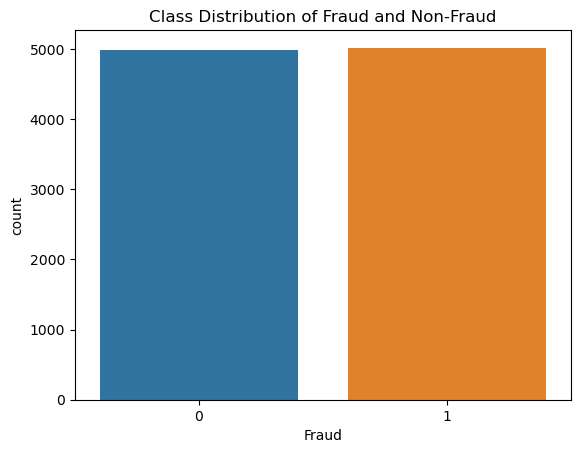

In [73]:
sns.countplot(x='Fraud', data=data)
plt.title("Class Distribution of Fraud and Non-Fraud")
plt.show()

Report: The graph shows the distribution of fraud vs. non-fraud cases, helping to identify if the classes are imbalanced therefore the distribution between fraudulent (1) and non-fraudulent (0) transactions is relatively close, making it suitable for most machine learning models 

In [74]:
# Convert Fraud and Profession to string type (optional, for cleaner visualization)
data['Profession'] = data['Profession'].astype(str)
data['Fraud'] = data['Fraud'].astype(str)

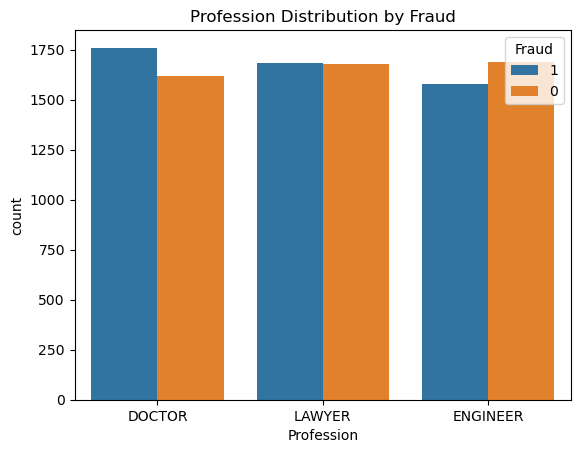

In [75]:
sns.countplot(x='Profession', data=data, hue='Fraud')
plt.title("Profession Distribution by Fraud")
plt.show()

Report: This breakdown by profession helps understand if any profession has a higher fraud rate. The chart shows a slight increase in fraudulent transactions among Doctors compared to Lawyers and Engineers

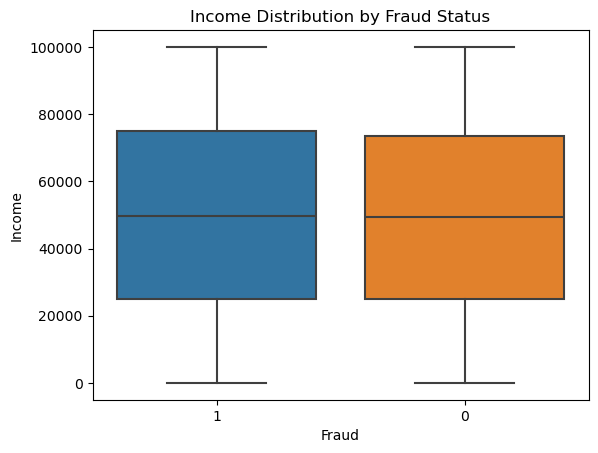

In [76]:
sns.boxplot(x='Fraud', y='Income', data=data)
plt.title("Income Distribution by Fraud Status")
plt.show()

Report: Analyzing income distribution to see if there's a significant difference between fraud and non-fraud cases. Therefore the boxplot shows that fraudulent transactions tend to have relatively closer incomes compared to non-fraudulent transactions.

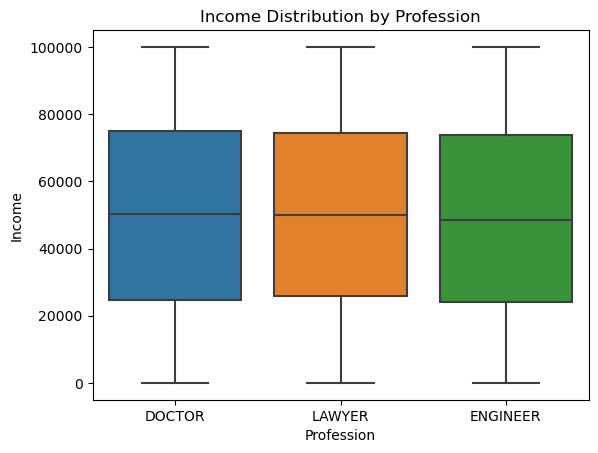

In [77]:
sns.boxplot(x='Profession', y='Income', data=data)
plt.title("Income Distribution by Profession")
plt.show()

Report: This provides insight into typical income ranges across professions and may indicate if higher incomes correlate with fraud. Therefor the boxplot reveals that Engineers generally have slightly equal income, with Lawyers and Doctors.

In [78]:
data['Fraud'] = pd.to_numeric(data['Fraud'], errors='coerce')

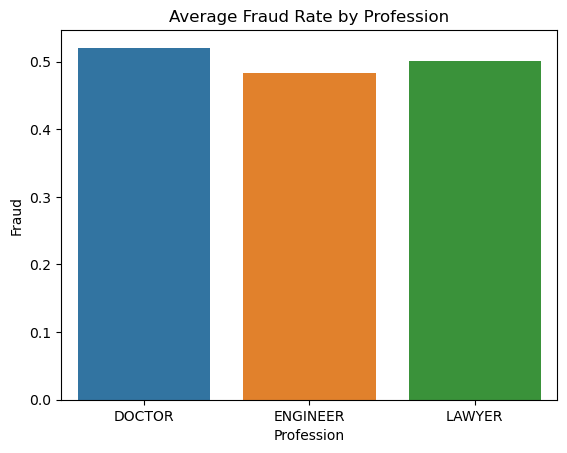

In [79]:
fraud_rate = data.groupby('Profession')['Fraud'].mean().reset_index()
sns.barplot(x='Profession', y='Fraud', data=fraud_rate)
plt.title("Average Fraud Rate by Profession")
plt.show()

Report: Visualizes the average fraud rate per profession, helping to identify professions that might be more fraud-prone. Therefore the chart shows that Doctors have the highest average fraud rate compared to Lawyers and Engineers.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


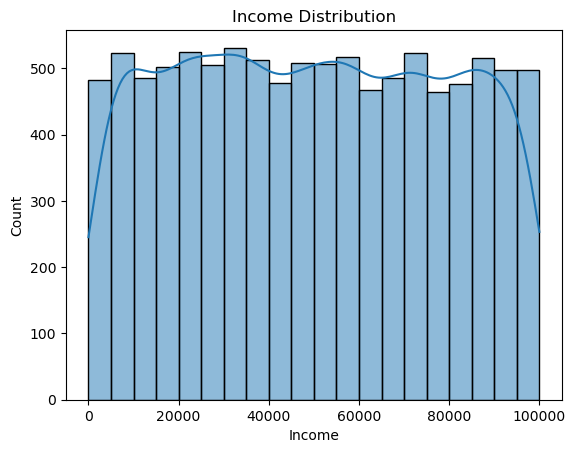

In [80]:
sns.histplot(data['Income'], bins=20, kde=True)
plt.title("Income Distribution")
plt.show()

Report: Displays the overall income distribution to understand how incomes are spread across the dataset. Therefor the histogram shows a relatively even distribution of incomes across the range, with a slight peak around the 40,000 to 70,000 income bracket.

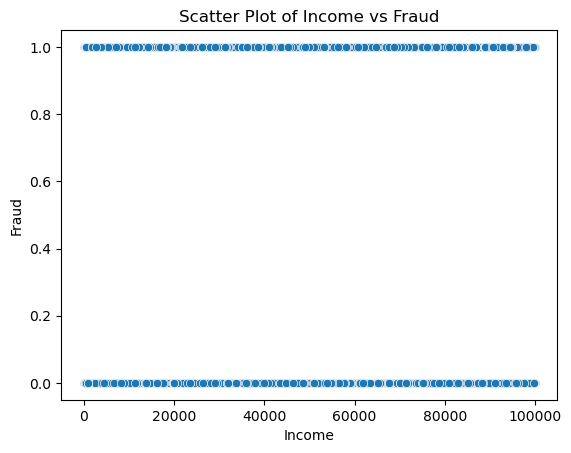

In [81]:
sns.scatterplot(x='Income', y='Fraud', data=data)
plt.title("Scatter Plot of Income vs Fraud")
plt.show()

Report: Shows the relationship between income and fraud occurrence, checking if there's a trend where higher or lower incomes relate to fraud. Therefor the scatter plot suggests that there is no clear relationship between income and fraud, as the data points are scattered randomly across the income range.

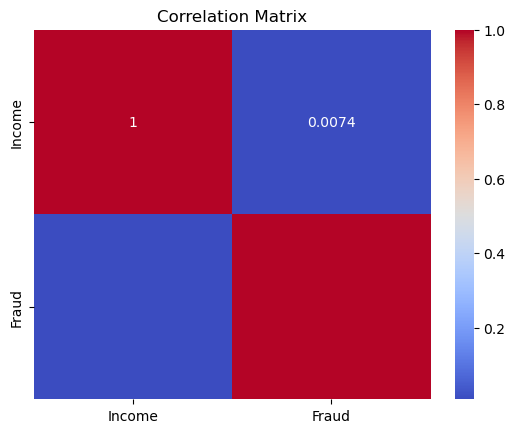

In [82]:
sns.heatmap(data[['Income', 'Fraud']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Report: Displays the correlation matrix to highlight the strength of relationships between numerical features and fraud. Therefor the correlation matrix shows a very weak positive correlation between income and fraud, indicating that there is almost no linear relationship between the two variables.

In [87]:
# Convert Expiry_Year to categorical
data['Expiry_Year'] = data['Expiry_Year'].astype('category')

# Recheck the dtypes
print(data.dtypes)


Profession              object
Income                   int64
Credit_card_number       int64
Expiry                  object
Security_code            int64
Fraud                 category
Expiry_Year           category
dtype: object


AttributeError: 'int' object has no attribute 'startswith'

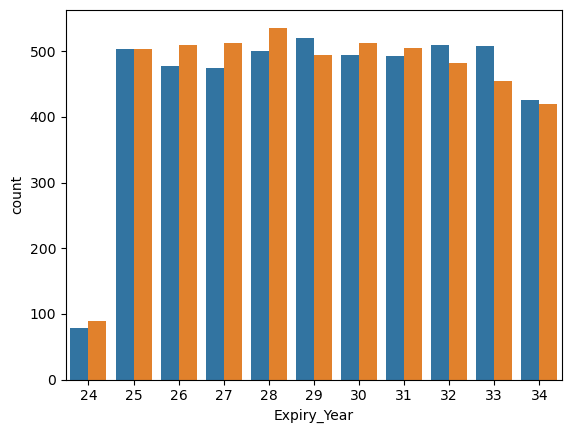

In [84]:
# Ensure all values in 'Expiry' are treated as strings
data['Expiry'] = data['Expiry'].astype(str)

# Extract the year from the 'Expiry' column
def extract_year(expiry):
    try:
        if '/' in expiry:  # Check if the format is correct
            return int(expiry.split('/')[1])
        else:
            return None  # Handle invalid formats
    except Exception:
        return None  # Handle unexpected cases

data['Expiry_Year'] = data['Expiry'].apply(extract_year)

# Convert 'Fraud' to categorical
data['Fraud'] = data['Fraud'].astype('category')

# Plot the count of Expiry_Year by Fraud status
sns.countplot(x='Expiry_Year', hue='Fraud', data=data)
plt.title("Expiry Year Distribution by Fraud Count")
plt.show()


AttributeError: 'int' object has no attribute 'startswith'

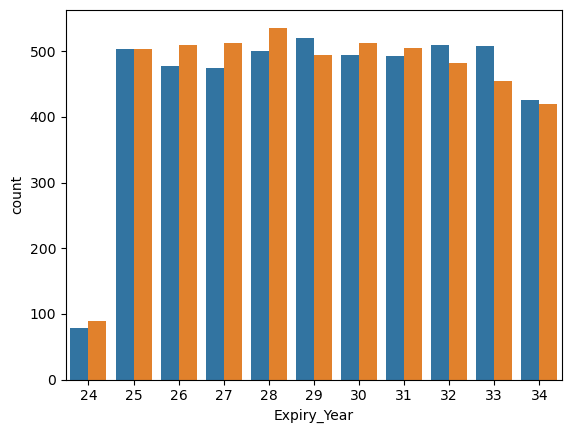

In [88]:
data['Expiry_Year'] = data['Expiry'].apply(lambda x: int(x.split('/')[1]))
sns.countplot(x='Expiry_Year', hue='Fraud', data=data)
plt.title("Expiry Year Distribution by Fraud Count")
plt.show()